In [4]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Reshape

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for training and testing datasets
train_dir = r"C:\Users\achyu\Downloads\Natural_Disasters_Analysis_And_Classification-main(1)\Natural_Disasters_Analysis_And_Classification-main\Project Files\dataset\train_set"
test_dir = r"C:\Users\achyu\Downloads\Natural_Disasters_Analysis_And_Classification-main(1)\Natural_Disasters_Analysis_And_Classification-main\Project Files\dataset\test_set"

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the images
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale test images

# Load images from directories
x_train = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Resize images to (64, 64)
    batch_size=32,         # Batch size for training
    color_mode='rgb',      # RGB images
    class_mode='categorical'  # For multi-class classification
)

x_test = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical'
)

# Number of classes (if not detected automatically from the directories)
num_classes = len(x_train.class_indices)
print(f"Number of classes: {num_classes}")


Found 742 images belonging to 4 classes.
Found 198 images belonging to 4 classes.
Number of classes: 4


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Initialize CNN model
cnn_model = Sequential()

# First Convolution layer
cnn_model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Max Pooling layer
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolution layer
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dense(units=num_classes, activation='softmax'))  # Assuming multiple classes

# Compile the model
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()


C:\Users\achyu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,668 (6.20 MB)

 Trainable params: 1,625,668 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Flatten, Reshape

# Build the RNN model with reshaped input
rnn_model = Sequential()

# Reshape layer to adjust the input shape for RNN
rnn_model.add(Reshape((64, 64*3), input_shape=(64, 64, 3)))  # Flatten the image into 2D for RNN input

# Add RNN layer
rnn_model.add(SimpleRNN(64, activation='relu', return_sequences=False))

# Add a fully connected layer
rnn_model.add(Dense(units=128, activation='relu'))

# Output layer (assuming 4 classes)
rnn_model.add(Dense(units=4, activation='softmax'))

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()



C:\Users\achyu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 64, 192)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,284 (98.77 KB)

 Trainable params: 25,284 (98.77 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

# Initialize HashNet model (Approximation)
hashnet_model = Sequential()

# Add convolutional layers
hashnet_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
hashnet_model.add(MaxPooling2D(pool_size=(2, 2)))
hashnet_model.add(Conv2D(64, (3, 3), activation='relu'))
hashnet_model.add(MaxPooling2D(pool_size=(2, 2)))

# Global average pooling layer
hashnet_model.add(GlobalAveragePooling2D())

# Fully connected layers
hashnet_model.add(Dense(128, activation='relu'))
hashnet_model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Compile model
hashnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

hashnet_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,228 (110.27 KB)

 Trainable params: 28,228 (110.27 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from keras.applications import DenseNet121
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import Adam

# Load DenseNet121 model without the top (classifier) layer
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Add custom layers on top of DenseNet
x = densenet_base.output
x = GlobalAveragePooling2D()(x)  # Pooling
x = Dense(128, activation='relu')(x)  # Fully connected layer
output = Dense(num_classes, activation='softmax')(x)  # Output layer

# Create the final model
densenet_model = Model(inputs=densenet_base.input, outputs=output)

# Compile model
densenet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

densenet_model.summary()


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 70, 70, 3)         │               0 │ input_layer_3[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 32, 32, 64)        │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 32, 32, 64)        │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 34, 34, 64)        │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 16, 16, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 16, 16, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 16, 16, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,169,220 (27.35 MB)

 Trainable params: 7,085,572 (27.03 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [10]:
# Initialize FCNN model
fcnn_model = Sequential()

# Flatten the input
fcnn_model.add(Flatten(input_shape=(64, 64, 3)))

# Fully connected layers
fcnn_model.add(Dense(128, activation='relu'))
fcnn_model.add(Dense(128, activation='relu'))
fcnn_model.add(Dense(num_classes, activation='softmax'))

# Compile the FCNN model
fcnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

fcnn_model.summary()


C:\Users\achyu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       1,572,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,590,020 (6.07 MB)

 Trainable params: 1,590,020 (6.07 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Import VGG16 from Keras applications
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.optimizers import Adam

# Load VGG16 model without the top (classifier) layer
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Add custom layers on top of VGG
x = vgg_base.output
x = GlobalAveragePooling2D()(x)  # Pooling
x = Dense(128, activation='relu')(x)  # Fully connected layer
output = Dense(num_classes, activation='softmax')(x)  # Output layer

# Create the final model
vgg_model = Model(inputs=vgg_base.input, outputs=output)

# Compile model
vgg_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

vgg_model.summary()


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          65,6

 Total params: 14,780,868 (56.38 MB)

 Trainable params: 14,780,868 (56.38 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from keras.models import Model
from keras.layers import Input, Average
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np

# Assuming dataset is loaded as `X_train`, `y_train`, `X_val`, `y_val`
# Example shapes:
# X_train.shape = (num_samples, 64, 64, 3)
# y_train.shape = (num_samples, num_classes)

# For demonstration purposes, generating random data:
X_train = np.random.random((1000, 64, 64, 3))  # Random data, replace with actual dataset
y_train = to_categorical(np.random.randint(0, 4, 1000), 4)  # Random labels for 4 classes
X_val = np.random.random((200, 64, 64, 3))  # Random validation data
y_val = to_categorical(np.random.randint(0, 4, 200), 4)  # Random validation labels

# Select the models you want to ensemble
models_to_ensemble = [cnn_model, vgg_model, densenet_model]  # Select models

# Manually define the input shape
input_shape = (64, 64, 3)  # Input shape of your models

# Create a single shared input tensor for all models
input_tensor = Input(shape=input_shape)

# Get the outputs for each model based on the shared input tensor
outputs = [model(input_tensor) for model in models_to_ensemble]

# Use average of the outputs to combine the models
ensemble_output = Average()(outputs)

# Create the ensemble model with a single input tensor and the combined output
ensemble_model = Model(inputs=input_tensor, outputs=ensemble_output)

# Compile the ensemble model
ensemble_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Debugging: Check if the model summary looks good
ensemble_model.summary()

# Train the ensemble model
ensemble_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=2)  # Reduced batch size and verbose=2


Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential (Sequential)       │ (None, 4)                 │       1,625,668 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ functional_23 (Functional)    │ (None, 4)                 │      14,780,868 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ functional_18 (Functional)    │ (None, 4)                 │       7,169,220 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ average (Average)             │ (None, 4)                 │               0 │ sequential[0][0],          │
│                               │                           │                 │ functional_23[0][0],       │
│                               │                           │                 │ functional_18[0][0]        │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 23,575,756 (89.93 MB)

 Trainable params: 23,492,108 (89.62 MB)

 Non-trainable params: 83,648 (326.75 KB)

Epoch 1/20
32/32 - 119s - 4s/step - accuracy: 0.2320 - loss: 1.5253 - val_accuracy: 0.2600 - val_loss: 1.4679
Epoch 2/20
32/32 - 55s - 2s/step - accuracy: 0.2780 - loss: 1.3931 - val_accuracy: 0.2600 - val_loss: 1.4205
Epoch 3/20
32/32 - 82s - 3s/step - accuracy: 0.4640 - loss: 1.2671 - val_accuracy: 0.2400 - val_loss: 1.4554
Epoch 4/20
32/32 - 85s - 3s/step - accuracy: 0.4610 - loss: 1.2432 - val_accuracy: 0.2750 - val_loss: 1.5181
Epoch 5/20
32/32 - 79s - 2s/step - accuracy: 0.4390 - loss: 1.2686 - val_accuracy: 0.2750 - val_loss: 1.5835
Epoch 6/20
32/32 - 82s - 3s/step - accuracy: 0.3640 - loss: 1.3498 - val_accuracy: 0.2600 - val_loss: 1.4891
Epoch 7/20
32/32 - 55s - 2s/step - accuracy: 0.4630 - loss: 1.2365 - val_accuracy: 0.1850 - val_loss: 1.5866
Epoch 8/20
32/32 - 83s - 3s/step - accuracy: 0.4850 - loss: 1.2268 - val_accuracy: 0.2600 - val_loss: 1.4934
Epoch 9/20
32/32 - 83s - 3s/step - accuracy: 0.5070 - loss: 1.2025 - val_accuracy: 0.2350 - val_loss: 1.5056
Epoch 10/20
32/32 

In [11]:
from keras.models import Model
from keras.layers import Input, Average
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np

# Assuming dataset is loaded as `X_train`, `y_train`, `X_val`, `y_val`
# Example shapes:
# X_train.shape = (num_samples, 64, 64, 3)
# y_train.shape = (num_samples, num_classes)

# For demonstration purposes, generating random data:
X_train = np.random.random((1000, 64, 64, 3))  # Random data, replace with actual dataset
y_train = to_categorical(np.random.randint(0, 4, 1000), 4)  # Random labels for 4 classes
X_val = np.random.random((200, 64, 64, 3))  # Random validation data
y_val = to_categorical(np.random.randint(0, 4, 200), 4)  # Random validation labels

# Select the models you want to ensemble
models_to_ensemble = [cnn_model, rnn_model, densenet_model]  # Select models

# Manually define the input shape
input_shape = (64, 64, 3)  # Input shape of your models

# Create a single shared input tensor for all models
input_tensor = Input(shape=input_shape)

# Get the outputs for each model based on the shared input tensor
outputs = [model(input_tensor) for model in models_to_ensemble]

# Use average of the outputs to combine the models
ensemble_output = Average()(outputs)

# Create the ensemble model with a single input tensor and the combined output
ensemble_model = Model(inputs=input_tensor, outputs=ensemble_output)

# Compile the ensemble model
ensemble_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Debugging: Check if the model summary looks good
ensemble_model.summary()

# Train the ensemble model
ensemble_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=2)  # Reduced batch size and verbose=2


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential (Sequential)       │ (None, 4)                 │       1,625,668 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential_1 (Sequential)     │ (None, 4)                 │          25,284 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ functional_18 (Functional)    │ (None, 4)                 │       7,169,220 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ average_2 (Average)           │ (None, 4)                 │               0 │ sequential[2][0],          │
│                               │                           │                 │ sequential_1[0][0],        │
│                               │                           │                 │ functional_18[2][0]        │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 8,820,172 (33.65 MB)

 Trainable params: 8,736,524 (33.33 MB)

 Non-trainable params: 83,648 (326.75 KB)

Epoch 1/20
32/32 - 101s - 3s/step - accuracy: 0.2620 - loss: 1.5495 - val_accuracy: 0.2550 - val_loss: 1.7521
Epoch 2/20
32/32 - 76s - 2s/step - accuracy: 0.3060 - loss: 1.3835 - val_accuracy: 0.2550 - val_loss: 1.7162
Epoch 3/20
32/32 - 83s - 3s/step - accuracy: 0.3700 - loss: 1.3220 - val_accuracy: 0.2150 - val_loss: 1.6461
Epoch 4/20
32/32 - 83s - 3s/step - accuracy: 0.4440 - loss: 1.2446 - val_accuracy: 0.2400 - val_loss: 1.5875
Epoch 5/20
32/32 - 44s - 1s/step - accuracy: 0.4690 - loss: 1.1753 - val_accuracy: 0.2550 - val_loss: 1.7060
Epoch 6/20
32/32 - 82s - 3s/step - accuracy: 0.5140 - loss: 1.0797 - val_accuracy: 0.2650 - val_loss: 1.6058
Epoch 7/20
32/32 - 82s - 3s/step - accuracy: 0.5180 - loss: 1.0186 - val_accuracy: 0.2500 - val_loss: 1.5647
Epoch 8/20
32/32 - 82s - 3s/step - accuracy: 0.4880 - loss: 1.0317 - val_accuracy: 0.1850 - val_loss: 1.6370
Epoch 9/20
32/32 - 82s - 3s/step - accuracy: 0.5470 - loss: 0.9747 - val_accuracy: 0.2350 - val_loss: 1.8765
Epoch 10/20
32/32 

In [12]:
from keras.models import Model
from keras.layers import Input, Average
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np

# Assuming dataset is loaded as `X_train`, `y_train`, `X_val`, `y_val`
# Example shapes:
# X_train.shape = (num_samples, 64, 64, 3)
# y_train.shape = (num_samples, num_classes)

# For demonstration purposes, generating random data:
X_train = np.random.random((1000, 64, 64, 3))  # Random data, replace with actual dataset
y_train = to_categorical(np.random.randint(0, 4, 1000), 4)  # Random labels for 4 classes
X_val = np.random.random((200, 64, 64, 3))  # Random validation data
y_val = to_categorical(np.random.randint(0, 4, 200), 4)  # Random validation labels

# Select the models you want to ensemble
models_to_ensemble = [cnn_model, rnn_model, densenet_model,vgg_model]  # Select models

# Manually define the input shape
input_shape = (64, 64, 3)  # Input shape of your models

# Create a single shared input tensor for all models
input_tensor = Input(shape=input_shape)

# Get the outputs for each model based on the shared input tensor
outputs = [model(input_tensor) for model in models_to_ensemble]

# Use average of the outputs to combine the models
ensemble_output = Average()(outputs)

# Create the ensemble model with a single input tensor and the combined output
ensemble_model = Model(inputs=input_tensor, outputs=ensemble_output)

# Compile the ensemble model
ensemble_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Debugging: Check if the model summary looks good
ensemble_model.summary()

# Train the ensemble model
ensemble_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=2)  # Reduced batch size and verbose=2


Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential (Sequential)       │ (None, 4)                 │       1,625,668 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential_1 (Sequential)     │ (None, 4)                 │          25,284 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ functional_18 (Functional)    │ (None, 4)                 │       7,169,220 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ functional_23 (Functional)    │ (None, 4)                 │      14,780,868 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ average_3 (Average)           │ (None, 4)                 │               0 │ sequential[3][0],          │
│                               │                           │                 │ sequential_1[1][0],        │
│                               │                           │                 │ functional_18[3][0],       │
│                               │                           │                 │ functional_23[2][0]        │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 23,601,040 (90.03 MB)

 Trainable params: 23,517,392 (89.71 MB)

 Non-trainable params: 83,648 (326.75 KB)

Epoch 1/20
32/32 - 132s - 4s/step - accuracy: 0.2490 - loss: 1.6573 - val_accuracy: 0.2700 - val_loss: 1.4512
Epoch 2/20
32/32 - 75s - 2s/step - accuracy: 0.3260 - loss: 1.3747 - val_accuracy: 0.2500 - val_loss: 1.4838
Epoch 3/20
32/32 - 85s - 3s/step - accuracy: 0.3720 - loss: 1.3141 - val_accuracy: 0.2750 - val_loss: 1.4615
Epoch 4/20
32/32 - 81s - 3s/step - accuracy: 0.4420 - loss: 1.2557 - val_accuracy: 0.2300 - val_loss: 1.5191
Epoch 5/20
32/32 - 84s - 3s/step - accuracy: 0.4900 - loss: 1.1694 - val_accuracy: 0.2500 - val_loss: 1.4420
Epoch 6/20
32/32 - 80s - 3s/step - accuracy: 0.5420 - loss: 1.1219 - val_accuracy: 0.2250 - val_loss: 1.5638
Epoch 7/20
32/32 - 81s - 3s/step - accuracy: 0.5980 - loss: 1.0462 - val_accuracy: 0.2450 - val_loss: 1.6547
Epoch 8/20
32/32 - 72s - 2s/step - accuracy: 0.6050 - loss: 1.0173 - val_accuracy: 0.2500 - val_loss: 1.5414
Epoch 9/20
32/32 - 82s - 3s/step - accuracy: 0.6310 - loss: 0.9736 - val_accuracy: 0.2400 - val_loss: 1.5593
Epoch 10/20
32/32 

In [16]:
from keras.models import Model
from keras.layers import Input, Average
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np

# Assuming dataset is loaded as `X_train`, `y_train`, `X_val`, `y_val`
# Example shapes:
# X_train.shape = (num_samples, 64, 64, 3)
# y_train.shape = (num_samples, num_classes)

# For demonstration purposes, generating random data:
X_train = np.random.random((1000, 64, 64, 3))  # Random data, replace with actual dataset
y_train = to_categorical(np.random.randint(0, 4, 1000), 4)  # Random labels for 4 classes
X_val = np.random.random((200, 64, 64, 3))  # Random validation data
y_val = to_categorical(np.random.randint(0, 4, 200), 4)  # Random validation labels

# Select the models you want to ensemble
models_to_ensemble = [cnn_model, rnn_model, densenet_model, vgg_model, fcnn_model]  # Select models

# Manually define the input shape
input_shape = (64, 64, 3)  # Input shape of your models

# Create a single shared input tensor for all models
input_tensor = Input(shape=input_shape)

# Get the outputs for each model based on the shared input tensor
outputs = [model(input_tensor) for model in models_to_ensemble]

# Use average of the outputs to combine the models
ensemble_output = Average()(outputs)

# Create the ensemble model with a single input tensor and the combined output
ensemble_model = Model(inputs=input_tensor, outputs=ensemble_output)

# Compile the ensemble model
ensemble_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Debugging: Check if the model summary looks good
ensemble_model.summary()

# Train the ensemble model
ensemble_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=2)  # Reduced batch size and verbose=2


Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)   │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential (Sequential)       │ (None, 4)                 │       1,625,668 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential_1 (Sequential)     │ (None, 4)                 │          25,284 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ functional_18 (Functional)    │ (None, 4)                 │       7,169,220 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ functional_23 (Functional)    │ (None, 4)                 │      14,780,868 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sequential_3 (Sequential)     │ (None, 4)                 │       1,590,020 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ average_4 (Average)           │ (None, 4)                 │               0 │ sequential[4][0],          │
│                               │                           │                 │ sequential_1[3][0],        │
│                               │                           │                 │ functional_18[4][0],       │
│                               │                           │                 │ functional_23[4][0],       │
│                               │                           │                 │ sequential_3[3][0]         │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 25,191,060 (96.10 MB)

 Trainable params: 25,107,412 (95.78 MB)

 Non-trainable params: 83,648 (326.75 KB)

Epoch 1/20
32/32 - 127s - 4s/step - accuracy: 0.2670 - loss: 1.3863 - val_accuracy: 0.2450 - val_loss: 1.3881
Epoch 2/20
32/32 - 70s - 2s/step - accuracy: 0.2660 - loss: 1.3866 - val_accuracy: 0.2450 - val_loss: 1.3884
Epoch 3/20
32/32 - 64s - 2s/step - accuracy: 0.2670 - loss: 1.3859 - val_accuracy: 0.2450 - val_loss: 1.3880
Epoch 4/20
32/32 - 63s - 2s/step - accuracy: 0.2680 - loss: 1.3863 - val_accuracy: 0.2450 - val_loss: 1.3894
Epoch 5/20
32/32 - 84s - 3s/step - accuracy: 0.2740 - loss: 1.3832 - val_accuracy: 0.2450 - val_loss: 1.3885
Epoch 6/20
32/32 - 3726s - 116s/step - accuracy: 0.2670 - loss: 1.3845 - val_accuracy: 0.2450 - val_loss: 1.3927
Epoch 7/20
32/32 - 67s - 2s/step - accuracy: 0.2900 - loss: 1.3777 - val_accuracy: 0.2650 - val_loss: 1.3865
Epoch 8/20
32/32 - 71s - 2s/step - accuracy: 0.3020 - loss: 1.3700 - val_accuracy: 0.2100 - val_loss: 1.3913
Epoch 9/20
32/32 - 76s - 2s/step - accuracy: 0.3770 - loss: 1.3501 - val_accuracy: 0.2550 - val_loss: 1.4019
Epoch 10/20
32

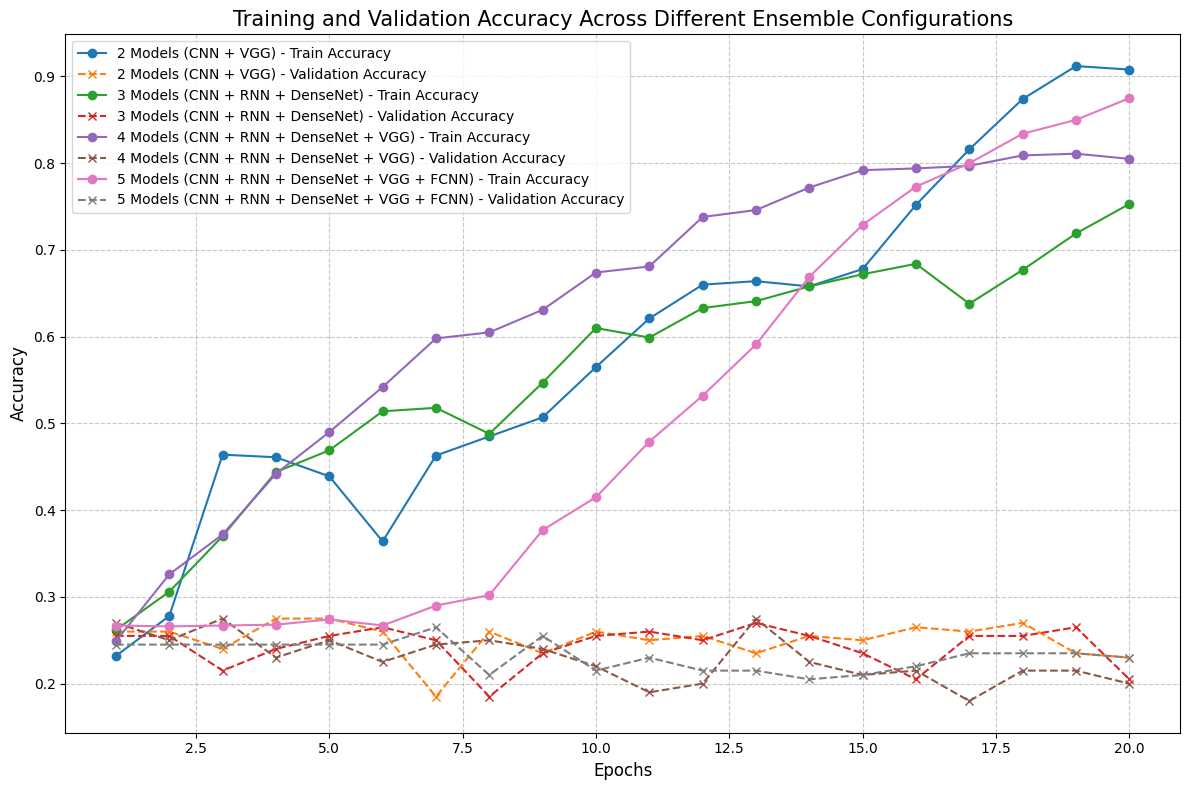

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Training results for different ensemble configurations
ensemble_configs = [
    # 2-model ensemble
    {'models': '2 Models (CNN + VGG)', 
     'train_accuracy': [0.2320, 0.2780, 0.4640, 0.4610, 0.4390, 0.3640, 0.4630, 0.4850, 0.5070, 0.5650, 
                        0.6210, 0.6600, 0.6640, 0.6580, 0.6780, 0.7520, 0.8160, 0.8740, 0.9120, 0.9080],
     'val_accuracy': [0.2600, 0.2600, 0.2400, 0.2750, 0.2750, 0.2600, 0.1850, 0.2600, 0.2350, 0.2600, 
                      0.2500, 0.2550, 0.2350, 0.2550, 0.2500, 0.2650, 0.2600, 0.2700, 0.2350, 0.2300]
    },
    # 3-model ensemble
    {'models': '3 Models (CNN + RNN + DenseNet)', 
     'train_accuracy': [0.2620, 0.3060, 0.3700, 0.4440, 0.4690, 0.5140, 0.5180, 0.4880, 0.5470, 0.6100, 
                        0.5990, 0.6330, 0.6410, 0.6580, 0.6720, 0.6840, 0.6380, 0.6770, 0.7190, 0.7530],
     'val_accuracy': [0.2550, 0.2550, 0.2150, 0.2400, 0.2550, 0.2650, 0.2500, 0.1850, 0.2350, 0.2550, 
                      0.2600, 0.2500, 0.2700, 0.2550, 0.2350, 0.2050, 0.2550, 0.2550, 0.2650, 0.2050]
    },
    # 4-model ensemble
    {'models': '4 Models (CNN + RNN + DenseNet + VGG)', 
     'train_accuracy': [0.2490, 0.3260, 0.3720, 0.4420, 0.4900, 0.5420, 0.5980, 0.6050, 0.6310, 0.6740, 
                        0.6810, 0.7380, 0.7460, 0.7720, 0.7920, 0.7940, 0.7970, 0.8090, 0.8110, 0.8050],
     'val_accuracy': [0.2700, 0.2500, 0.2750, 0.2300, 0.2500, 0.2250, 0.2450, 0.2500, 0.2400, 0.2200, 
                      0.1900, 0.2000, 0.2750, 0.2250, 0.2100, 0.2150, 0.1800, 0.2150, 0.2150, 0.2000]
    },
    # 5-model ensemble
    {'models': '5 Models (CNN + RNN + DenseNet + VGG + FCNN)', 
     'train_accuracy': [0.2670, 0.2660, 0.2670, 0.2680, 0.2740, 0.2670, 0.2900, 0.3020, 0.3770, 0.4150, 
                        0.4790, 0.5320, 0.5910, 0.6690, 0.7290, 0.7730, 0.8000, 0.8340, 0.8500, 0.8750],
     'val_accuracy': [0.2450, 0.2450, 0.2450, 0.2450, 0.2450, 0.2450, 0.2650, 0.2100, 0.2550, 0.2150, 
                      0.2300, 0.2150, 0.2150, 0.2050, 0.2100, 0.2200, 0.2350, 0.2350, 0.2350, 0.2300]
    }
]

# Create the plot
plt.figure(figsize=(12, 8))

# Plot for each ensemble configuration
for config in ensemble_configs:
    plt.plot(range(1, 21), config['train_accuracy'], label=f'{config["models"]} - Train Accuracy', marker='o')
    plt.plot(range(1, 21), config['val_accuracy'], label=f'{config["models"]} - Validation Accuracy', marker='x', linestyle='--')

plt.title('Training and Validation Accuracy Across Different Ensemble Configurations', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

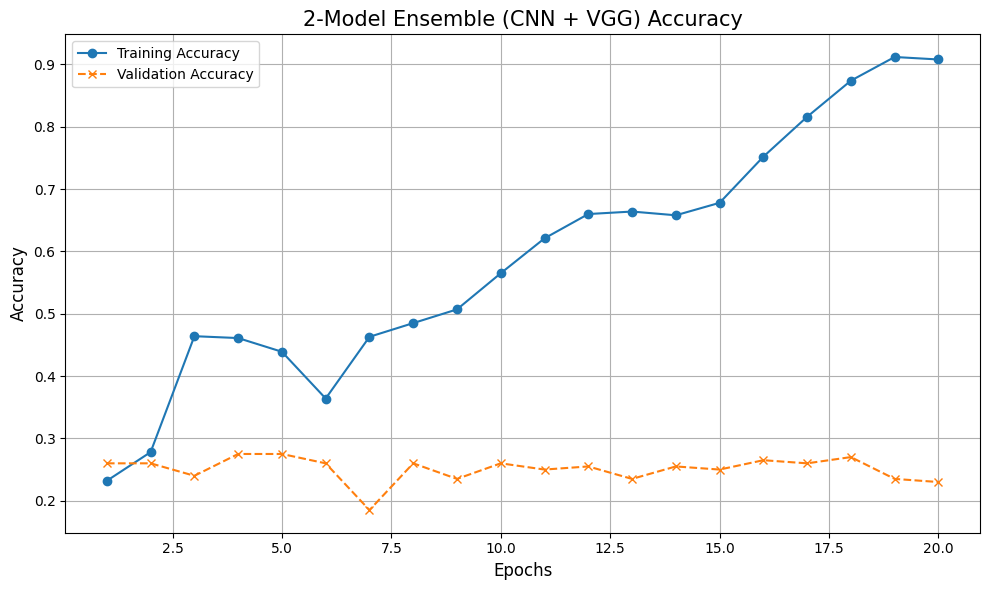

In [3]:
import matplotlib.pyplot as plt

# 2-model ensemble (CNN + VGG)
train_accuracy = [0.2320, 0.2780, 0.4640, 0.4610, 0.4390, 0.3640, 0.4630, 0.4850, 0.5070, 0.5650, 
                  0.6210, 0.6600, 0.6640, 0.6580, 0.6780, 0.7520, 0.8160, 0.8740, 0.9120, 0.9080]
val_accuracy = [0.2600, 0.2600, 0.2400, 0.2750, 0.2750, 0.2600, 0.1850, 0.2600, 0.2350, 0.2600, 
                0.2500, 0.2550, 0.2350, 0.2550, 0.2500, 0.2650, 0.2600, 0.2700, 0.2350, 0.2300]

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_accuracy, label='Training Accuracy', marker='o')
plt.plot(range(1, 21), val_accuracy, label='Validation Accuracy', marker='x', linestyle='--')
plt.title('2-Model Ensemble (CNN + VGG) Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()